In [1]:
import pandas as pd
import geopandas as gpd
import _config
import os

In [3]:
input_taz_shapefile_folder      = _config.input_taz_shapefile_folder
taz_shapefile                   = _config.taz_shapefile
se_years                        = _config.se_years
input_model_se_folder           = _config.input_model_se_folder
se_base_year                    = _config.se_base_year
df_centers                      = _config.df_centers
df_projects                     = _config.df_projects
df_emp_subcategories            = _config.df_emp_subcategories
hh_factor                       = _config.hh_factor
input_tdm_node_shapefile_folder = _config.input_tdm_node_shapefile_folder
tdm_node_shapefile              = _config.tdm_node_shapefile
input_model_line_files_folder   = _config.input_model_line_files_folder
tdm_transit_scenarios           = _config.tdm_transit_scenarios
map_year                        = _config.map_year

<AxesSubplot:>

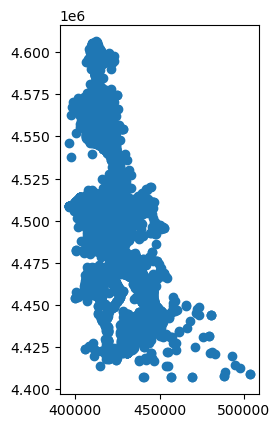

In [4]:
gdf_tdm_node = gpd.read_file(os.path.join(input_tdm_node_shapefile_folder, tdm_node_shapefile))
gdf_tdm_node.plot()

<AxesSubplot:>

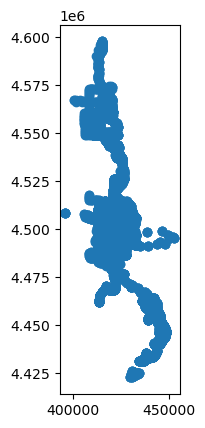

In [38]:
_df_transit_lin_files = pd.read_csv(os.path.join(input_model_line_files_folder, 'files.csv'))
_df_transit_lin_files_lines = pd.read_csv(os.path.join(input_model_line_files_folder, 'lines.csv'))

_df_transit_lin_files_nodes = pd.read_csv(os.path.join(input_model_line_files_folder, 'nodes.csv'))
_df_transit_lin_files_lines = pd.merge(_df_transit_lin_files, _df_transit_lin_files_lines, on=['file_index'])
_df_transit_lin_files_lines_nodes = pd.merge(_df_transit_lin_files_lines, _df_transit_lin_files_nodes, on=['file_index','name'])

_df_transit_lin_files_lines_nodes = _df_transit_lin_files_lines_nodes[_df_transit_lin_files_lines_nodes['transit_scenario'].isin(tdm_transit_scenarios)]
_df_transit_lin_files_lines_nodes = _df_transit_lin_files_lines_nodes[_df_transit_lin_files_lines_nodes['is_stop']==True]
#display(_df_transit_lin_files_lines_nodes)

gdf_tdm_node_transit = pd.merge(gdf_tdm_node, _df_transit_lin_files_lines_nodes, left_on='N', right_on='node_id')
gdf_tdm_node_transit.plot()

,AreaName,AreaType,Area,TAZID,CO_FIPS,TAZACRES,sqm,acres,geometry
0,Crossroads,City Center,Utah County,2496,49,165.490872,306078.979084,75.633763,"POLYGON ((-111.91914 40.36320, -111.92219 40.3..."
1,Crossroads,City Center,Utah County,2503,49,85.734122,185231.805669,45.771776,"POLYGON ((-111.91317 40.36533, -111.91614 40.3..."
2,Crossroads,City Center,Utah County,2504,49,146.410140,82.317025,0.020341,"POLYGON ((-111.91119 40.36903, -111.91119 40.3..."
3,Crossroads,City Center,Utah County,2505,49,76.823967,167718.011467,41.444023,"POLYGON ((-111.91104 40.36931, -111.91109 40.3..."
4,Crossroads,City Center,Utah County,2498,49,112.631810,268457.440292,66.337278,"POLYGON ((-111.92369 40.37610, -111.92271 40.3..."
...,...,...,...,...,...,...,...,...,...
1224,Meadowbrook Station,City Center,WFRC MPO,1492,35,45.728115,149005.282516,36.820007,"POLYGON ((-111.89671 40.69254, -111.89631 40.6..."
1225,Meadowbrook Station,City Center,WFRC MPO,1493,35,50.633831,109626.735660,27.089356,"MULTIPOLYGON (((-111.89400 40.69107, -111.8911..."
1226,Meadowbrook Station,City Center,WFRC MPO,1494,35,50.381448,108708.827297,26.862536,"POLYGON ((-111.89101 40.69108, -111.88828 40.6..."
1227,Meadowbrook Station,City Center,WFRC MPO,1495,35,88.369280,93800.997173,23.178731,"POLYGON ((-111.88810 40.69110, -111.88808 40.6..."


<AxesSubplot:>

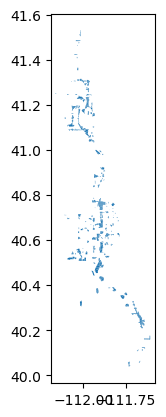

In [16]:
gdf_centers_taz = gpd.read_file('intermediate/centers-taz.geojson')
gdf_centers_taz = gdf_centers_taz.to_crs(epsg=4326)
display(gdf_centers_taz)
gdf_centers_taz.plot()

In [17]:
gdf_se_calcs_to_map = gpd.read_file('_site/data/se_calcs.geojson')
display(gdf_se_calcs_to_map.head(5))

,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,pctu_ch,parameter,taz_ratio,...,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den,geometry
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,920.487593,1016.758298,280.129659,823.722542,2.552243,9.739415,13.443180,10.890937,3.703765,"POLYGON ((-111.91914 40.36320, -111.92219 40.3..."
1,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,1.000000,TOTEMP,0.519737,...,640.804864,640.804864,-147.549034,632.055964,0.191142,17.223581,14.000000,13.808858,-3.223581,"POLYGON ((-111.91317 40.36533, -111.91614 40.3..."
2,Crossroads,City Center,2504,146.410140,49,82.317025,0.020341,1.000000,TOTEMP,0.001060,...,0.284774,0.284774,0.276291,0.281239,0.173766,0.417039,14.000000,13.826234,13.582961,"POLYGON ((-111.91119 40.36903, -111.91119 40.3..."
3,Crossroads,City Center,2505,76.823967,49,167718.011467,41.444023,1.000000,TOTEMP,0.995679,...,580.216325,580.216325,48.025968,540.057277,0.968995,12.841185,14.000000,13.031005,1.158815,"POLYGON ((-111.91104 40.36931, -111.91109 40.3..."
4,Crossroads,City Center,2498,112.631810,49,268457.440292,66.337278,0.533183,TOTEMP,0.789992,...,495.178829,649.698411,318.691575,511.449732,2.084027,4.989756,9.793866,7.709839,4.804110,"POLYGON ((-111.92369 40.37610, -111.92271 40.3..."


,TAZID,geometry,hhjobint
0,19,"POLYGON ((-112.01675 41.52880, -112.01714 41.5...",0.000000
1,20,"POLYGON ((-112.01546 41.52992, -112.01545 41.5...",0.000000
2,25,"MULTIPOLYGON (((-112.01710 41.52682, -112.0171...",0.000000
3,26,"POLYGON ((-112.01403 41.52492, -112.01548 41.5...",0.000000
4,30,"POLYGON ((-112.01551 41.52281, -112.01551 41.5...",0.000000
...,...,...,...
1224,3388,"POLYGON ((-111.67062 40.06263, -111.66976 40.0...",28.383439
1225,3394,"POLYGON ((-111.67114 40.05938, -111.67093 40.0...",37.687386
1226,3405,"POLYGON ((-111.67514 40.05604, -111.67501 40.0...",20.010305
1227,3406,"POLYGON ((-111.66866 40.05819, -111.66952 40.0...",48.413630


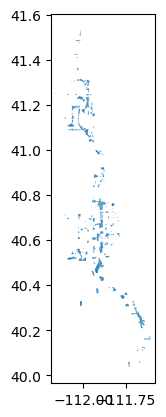

In [18]:
gdf_se_station_buffer_areas = gdf_se_calcs_to_map[gdf_se_calcs_to_map['parameter']=='TOTHHEMP'].groupby(['TAZID','geometry'], as_index=False).agg(hhjobint=('s_tot','sum'))

# Convert the DataFrame back to a GeoDataFrame
gdf_se_station_buffer_areas = gpd.GeoDataFrame(gdf_se_station_buffer_areas, geometry='geometry')

# Ensure the coordinate reference system (CRS) is the same as the original GeoDataFrame
gdf_se_station_buffer_areas.crs = gdf_se_calcs_to_map.crs

# Verify the GeoDataFrame
gdf_se_station_buffer_areas.plot()
gdf_se_station_buffer_areas

In [19]:
df_scenario_hhjobint_taz = gdf_se_station_buffer_areas.groupby(['TAZID'],as_index=False).agg(hhjobint_s=('hhjobint','sum'))
df_scenario_hhjobint_taz

,TAZID,hhjobint_s
0,19,0.000000
1,20,0.000000
2,25,0.000000
3,26,0.000000
4,30,0.000000
...,...,...
1126,3388,28.383439
1127,3394,37.687386
1128,3405,20.010305
1129,3406,48.413630


In [20]:
gdf_se_station_buffer_areas[gdf_se_station_buffer_areas['TAZID']==468]
#10036

,TAZID,geometry,hhjobint
175,468,"POLYGON ((-112.05412 41.19431, -112.05389 41.1...",1531.220389


In [21]:
taz_list = gdf_centers_taz['TAZID'].drop_duplicates()
taz_list

0       2496
1       2503
2       2504
3       2505
4       2498
        ... 
1224    1492
1225    1493
1226    1494
1227    1495
1228    1536
Name: TAZID, Length: 1131, dtype: int64

<AxesSubplot:>

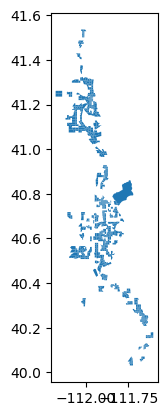

In [22]:
gdf_taz = gpd.read_file('input/taz-shapefile/' + taz_shapefile)
gdf_taz = gdf_taz[gdf_taz['TAZID'].isin(taz_list)]
gdf_taz = gdf_taz[['TAZID','geometry']]
gdf_taz = gdf_taz.to_crs(epsg=4326)
gdf_taz.plot()

In [25]:
#forecast_se_years = [year for year in se_years if year != se_base_year]
#
#display(forecast_se_years)
#
#df_se = pd.DataFrame()
#
#for f_year in forecast_se_years:

_df = pd.read_csv('output/SE_' + str(map_year) + '_centers_strategy.csv')
_df = _df[[';TAZID','TOTHH','TOTEMP']].rename(columns={';TAZID':'TAZID'})
_df['hhjobint_t'] = (_df['TOTHH'] * hh_factor) + _df['TOTEMP']

_df = pd.merge(_df, df_scenario_hhjobint_taz, on='TAZID', how='left').fillna(0)

_df['hhjobint'] = _df['hhjobint_t'] - _df['hhjobint_s']

_df.loc[_df['hhjobint']<0,'hhjobint']=0

_df['YEAR'] = map_year

df_se = _df
# df_se = pd.concat([df_se,_df])

display(df_se)

,TAZID,TOTHH,TOTEMP,hhjobint_t,hhjobint_s,hhjobint,YEAR
0,1,0.0,0.0,0.00,0.0,0.00,2050
1,2,38.5,0.0,69.30,0.0,69.30,2050
2,3,18.5,0.0,33.30,0.0,33.30,2050
3,4,5.3,0.0,9.54,0.0,9.54,2050
4,5,70.5,10.1,137.00,0.0,137.00,2050
...,...,...,...,...,...,...,...
3541,3542,2.0,0.0,3.60,0.0,3.60,2050
3542,3543,0.0,0.0,0.00,0.0,0.00,2050
3543,3544,0.0,0.0,0.00,0.0,0.00,2050
3544,3545,5.0,0.0,9.00,0.0,9.00,2050


<AxesSubplot:>

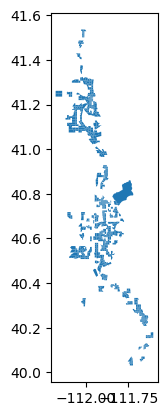

In [26]:
gdf_taz_with_se = pd.merge(gdf_taz, df_se, on='TAZID')
gdf_taz_with_se.plot()

In [27]:
gdf_taz_with_se

,TAZID,geometry,TOTHH,TOTEMP,hhjobint_t,hhjobint_s,hhjobint,YEAR
0,19,"POLYGON ((-112.01535 41.53580, -112.01535 41.5...",207.4000,52.5000,425.82000,0.000000,425.820000,2050
1,20,"POLYGON ((-112.00684 41.53555, -112.00556 41.5...",195.6000,151.0000,503.08000,0.000000,503.080000,2050
2,25,"POLYGON ((-112.01543 41.52826, -112.01543 41.5...",300.0000,161.7000,701.70000,0.000000,701.700000,2050
3,26,"POLYGON ((-112.01118 41.52823, -112.01111 41.5...",183.0000,183.1000,512.50000,0.000000,512.500000,2050
4,30,"POLYGON ((-112.01551 41.52285, -112.01551 41.5...",309.3000,83.3000,640.04000,0.000000,640.040000,2050
...,...,...,...,...,...,...,...,...
1126,3012,"POLYGON ((-111.65518 40.22573, -111.65517 40.2...",187.1705,331.4422,668.34910,668.349064,0.000036,2050
1127,2867,"POLYGON ((-111.67866 40.28234, -111.67735 40.2...",1039.1549,3033.9650,4904.44382,4673.269347,231.174473,2050
1128,3081,"POLYGON ((-111.63226 40.15394, -111.63226 40.1...",241.4993,600.6493,1035.34804,563.633411,471.714629,2050
1129,2356,"POLYGON ((-112.02124 40.32005, -112.02125 40.3...",172.7234,238.9900,549.89212,484.479805,65.412315,2050


In [ ]:
gdf_tdm_node_transit

,N,X,Y,GEOGKEY,EXTERNAL,HOTZN,TAZID,NODENAME,PNR_2015,PNR_2019,...,FARZN23_50,FARE23_32U,FARE23_42U,FARE23_50U,MAG_NODE,WFRC_NODE,geometry,project_id,node_id,is_stop


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Ensure both GeoDataFrames have the same CRS (e.g., UTM Zone 12N for accurate distance measurement in meters)
gdf_taz_with_se = gdf_taz_with_se.to_crs(epsg=32612)  # UTM Zone 12N
gdf_tdm_node_transit = gdf_tdm_node_transit.to_crs(epsg=32612)  # UTM Zone 12N

# Calculate the centroids of the polygons
gdf_taz_with_se['centroid'] = gdf_taz_with_se.centroid

# Initialize a list to store the distance data
distance_data = []

# Iterate over each centroid in gdf_taz_with_se
for idx_taz, taz_row in gdf_taz_with_se.iterrows():
    # Get the centroid geometry
    centroid = taz_row['centroid']
    
    # Iterate over each point in gdf_tdm_node_transit
    for idx_node, node_row in gdf_tdm_node_transit.iterrows():
        # Get the point geometry
        point = node_row['geometry']
        
        # Calculate the distance in meters
        distance_meters = centroid.distance(point)
        
        # Convert the distance to feet (1 meter = 3.28084 feet)
        distance_feet = round(distance_meters * 3.28084, 0)
        
        # Append the data to the list
        if distance_feet <= 10000:

            distance_data.append({
                'TAZID': taz_row['TAZID'],
                'NodeID_t': node_row['N'],  # assuming 'NodeID' is a column in gdf_tdm_node_transit
                'taz_distance_feet': distance_feet,
                'taz_hhjobint': taz_row['hhjobint']
            })

# Convert the distance data to a DataFrame
df_distances_taz_to_stop = pd.DataFrame(distance_data)

# Group by 'TAZID' and find the index of the minimum 'taz_distance_feet' for each group
min_distance_indices = df_distances_taz_to_stop.groupby('TAZID')['taz_distance_feet'].idxmin()

# Use the indices to get the rows with the minimum distances
df_distances_taz_to_stop = df_distances_taz_to_stop.loc[min_distance_indices]

# Verify the result
display(df_distances_taz_to_stop)


KeyError: 'TAZID'

In [ ]:
gdf_tdm_node_transit[gdf_tdm_node_transit['N']==15191]

,N,X,Y,GEOGKEY,EXTERNAL,HOTZN,TAZID,NODENAME,PNR_2015,PNR_2019,...,FARZN23_50,FARE23_32U,FARE23_42U,FARE23_50U,MAG_NODE,WFRC_NODE,geometry,project_id,node_id,is_stop
14,15191,400663.50204,4.567083e+06,NaN,0,0,0,NaN,0,0,...,0,0,0,0,0,0,POINT (400663.502 4567083.113),1,15191,True


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Ensure both GeoDataFrames have the same CRS (e.g., UTM Zone 12N for accurate distance measurement in meters)
gdf_se_station_buffer_areas = gdf_se_station_buffer_areas.to_crs(epsg=32612) 
 # UTM Zone 12N
gdf_tdm_node_transit  = gdf_tdm_node_transit .to_crs(epsg=32612)  # UTM Zone 12N

# Calculate the centroids of the polygons
gdf_se_station_buffer_areas['centroid'] = gdf_se_station_buffer_areas.centroid

# Initialize a list to store the distance data
distance_data = []

# Iterate over each centroid in gdf_se_station_buffer_areas
for idx_area, area_row in gdf_se_station_buffer_areas.iterrows():

    # Get the centroid geometry
    centroid = area_row['centroid']
        
    # Iterate over each point in gdf_tdm_node_transit
    for idx_node, node_row in gdf_tdm_node_transit.iterrows():
            
        if area_row['N'] == node_row['N']:
            # Get the point geometry
            point = node_row['geometry']
            
            # Calculate the distance in meters
            distance_meters = centroid.distance(point)
            
            # Convert the distance to feet (1 meter = 3.28084 feet)
            distance_feet = round(distance_meters * 3.28084, 0)
        
            if distance_feet==0:
                distance_feet = 1

            distance_data.append({
                'TAZID': area_row['TAZID'],
                'NodeID_a': node_row['N'],  # assuming 'NodeID' is a column in gdf_se_station_buffer_areas
                'area_distance_feet': distance_feet,
                'area_hhjobint': area_row['hhjobint']
            })

# Convert the distance data to a DataFrame
df_distances_area_to_stop = pd.DataFrame(distance_data)

df_distances_area_to_stop = df_distances_area_to_stop.groupby(['TAZID','NodeID_a'], as_index=False).agg(area_distance_feet=('area_distance_feet','mean'), area_hhjobint=('area_hhjobint','sum'))

# Verify the result
display(df_distances_area_to_stop)


,TAZID,NodeID_a,area_distance_feet,area_hhjobint
0,165,15191,1.0,6.588966
1,172,15185,399.0,12.855413
2,173,15184,522.0,1.912349
3,176,15183,409.0,58.756008
4,176,15184,424.0,16.995728
...,...,...,...,...
173,1521,25351,394.0,211.719751
174,1521,25602,283.0,93.701029
175,1530,25381,542.0,0.340703
176,1531,25381,87.0,778.008024


In [152]:
df_distances_taz_to_stop_areas = pd.merge(df_distances_area_to_stop, df_distances_taz_to_stop, on=['TAZID']).fillna(0)
df_distances_taz_to_stop_areas

,TAZID,NodeID_a,area_distance_feet,area_hhjobint,NodeID_t,taz_distance_feet,taz_hhjobint
0,165,15191,1.0,6.588966,15191,8157.0,775.077734
1,172,15185,399.0,12.855413,15185,2831.0,444.044527
2,173,15184,522.0,1.912349,15184,3935.0,613.987711
3,176,15183,409.0,58.756008,15183,2168.0,994.548265
4,176,15184,424.0,16.995728,15183,2168.0,994.548265
...,...,...,...,...,...,...,...
173,1521,25351,394.0,211.719751,25602,1605.0,1715.331680
174,1521,25602,283.0,93.701029,25602,1605.0,1715.331680
175,1530,25381,542.0,0.340703,25381,3188.0,2118.459197
176,1531,25381,87.0,778.008024,25381,2840.0,2351.922076


In [153]:
df_dist_hhjobint = df_distances_taz_to_stop_areas.copy()

df_dist_hhjobint['area_dist_x_int'] = round(df_dist_hhjobint['area_hhjobint'] * df_dist_hhjobint['area_distance_feet'], 0)
df_dist_hhjobint['taz_dist_x_int' ] = round(df_dist_hhjobint['taz_hhjobint' ] * df_dist_hhjobint['taz_distance_feet' ], 0)
df_dist_hhjobint

,TAZID,NodeID_a,area_distance_feet,area_hhjobint,NodeID_t,taz_distance_feet,taz_hhjobint,area_dist_x_int,taz_dist_x_int
0,165,15191,1.0,6.588966,15191,8157.0,775.077734,7.0,6322309.0
1,172,15185,399.0,12.855413,15185,2831.0,444.044527,5129.0,1257090.0
2,173,15184,522.0,1.912349,15184,3935.0,613.987711,998.0,2416042.0
3,176,15183,409.0,58.756008,15183,2168.0,994.548265,24031.0,2156181.0
4,176,15184,424.0,16.995728,15183,2168.0,994.548265,7206.0,2156181.0
...,...,...,...,...,...,...,...,...,...
173,1521,25351,394.0,211.719751,25602,1605.0,1715.331680,83418.0,2753107.0
174,1521,25602,283.0,93.701029,25602,1605.0,1715.331680,26517.0,2753107.0
175,1530,25381,542.0,0.340703,25381,3188.0,2118.459197,185.0,6753648.0
176,1531,25381,87.0,778.008024,25381,2840.0,2351.922076,67687.0,6679459.0


In [154]:
df_dist_hhjobint_group = df_dist_hhjobint.groupby(['TAZID','NodeID_t'], as_index=False).agg(area_dist_x_int_sum=('area_dist_x_int','sum'),area_hhjobint_sum=('area_hhjobint','sum'),
                                                                                 taz_dist_x_int_sum=('taz_dist_x_int','sum'),taz_hhjobint_sum=('taz_hhjobint','sum'))
df_dist_hhjobint_group['area_dist_weighted'] = df_dist_hhjobint_group['area_dist_x_int_sum'] / df_dist_hhjobint_group['area_hhjobint_sum']
df_dist_hhjobint_group['taz_dist_weighted'] = df_dist_hhjobint_group['taz_dist_x_int_sum'] / df_dist_hhjobint_group['taz_hhjobint_sum']

df_dist_hhjobint_group['dist_weighted'] = (df_dist_hhjobint_group['area_dist_x_int_sum'] + df_dist_hhjobint_group['taz_dist_x_int_sum']) / (df_dist_hhjobint_group['area_hhjobint_sum'] + df_dist_hhjobint_group['taz_hhjobint_sum'])

df_dist_hhjobint_group['dist_weighted_miles'] = df_dist_hhjobint_group['dist_weighted'] / 5280

df_dist_hhjobint_group


,TAZID,NodeID_t,area_dist_x_int_sum,area_hhjobint_sum,taz_dist_x_int_sum,taz_hhjobint_sum,area_dist_weighted,taz_dist_weighted,dist_weighted,dist_weighted_miles
0,165,15191,7.0,6.588966,6322309.0,775.077734,1.062382,8156.999899,8088.250401,1.531866
1,172,15185,5129.0,12.855413,1257090.0,444.044527,398.975889,2830.999877,2762.572041,0.523214
2,173,15184,998.0,1.912349,2416042.0,613.987711,521.871360,3935.000580,3924.402930,0.743258
3,176,15183,31237.0,75.751735,4312362.0,1989.096530,412.360191,2168.000364,2103.592343,0.398408
4,177,15189,1023.0,1022.686839,182466.0,408.200681,1.000306,447.000724,128.234398,0.024287
...,...,...,...,...,...,...,...,...,...,...
150,1520,25215,52443.0,132.849241,2915528.0,1773.435558,394.755737,1643.999968,1556.939971,0.294875
151,1521,25602,109935.0,305.420780,5506214.0,3430.663359,359.946039,1604.999798,1503.218019,0.284700
152,1530,25381,185.0,0.340703,6753648.0,2118.459197,542.994217,3188.000038,3187.574721,0.603707
153,1531,25381,67687.0,778.008024,6679459.0,2351.922076,87.000388,2840.000130,2155.685841,0.408274


In [161]:
df_dist_hhjobint_group['MODE'] = 12
df_dist_hhjobint_group['SPEED'] = 2.5  # mph
df_dist_hhjobint_group['DIST'] = round(df_dist_hhjobint_group['dist_weighted_miles'],2)
df_dist_hhjobint_group['COST'] = round(df_dist_hhjobint_group['dist_weighted_miles'] * (1/df_dist_hhjobint_group['SPEED']*60),2)  # it takes 24 minutes to walk 1 mile at 2.5 miles per hour
df_dist_hhjobint_group['ONEWAY'] = 'F'
df_dist_hhjobint_group

,TAZID,NodeID_t,area_dist_x_int_sum,area_hhjobint_sum,taz_dist_x_int_sum,taz_hhjobint_sum,area_dist_weighted,taz_dist_weighted,dist_weighted,dist_weighted_miles,MODE,SPEED,DIST,COST,ONEWAY
0,165,15191,7.0,6.588966,6322309.0,775.077734,1.062382,8156.999899,8088.250401,1.531866,12,2.5,1.53,36.76,F
1,172,15185,5129.0,12.855413,1257090.0,444.044527,398.975889,2830.999877,2762.572041,0.523214,12,2.5,0.52,12.56,F
2,173,15184,998.0,1.912349,2416042.0,613.987711,521.871360,3935.000580,3924.402930,0.743258,12,2.5,0.74,17.84,F
3,176,15183,31237.0,75.751735,4312362.0,1989.096530,412.360191,2168.000364,2103.592343,0.398408,12,2.5,0.40,9.56,F
4,177,15189,1023.0,1022.686839,182466.0,408.200681,1.000306,447.000724,128.234398,0.024287,12,2.5,0.02,0.58,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1520,25215,52443.0,132.849241,2915528.0,1773.435558,394.755737,1643.999968,1556.939971,0.294875,12,2.5,0.29,7.08,F
151,1521,25602,109935.0,305.420780,5506214.0,3430.663359,359.946039,1604.999798,1503.218019,0.284700,12,2.5,0.28,6.83,F
152,1530,25381,185.0,0.340703,6753648.0,2118.459197,542.994217,3188.000038,3187.574721,0.603707,12,2.5,0.60,14.49,F
153,1531,25381,67687.0,778.008024,6679459.0,2351.922076,87.000388,2840.000130,2155.685841,0.408274,12,2.5,0.41,9.80,F


In [164]:
# Open a file for writing (this will overwrite any existing file)
with open('output/Scenario_hand_coded_walk_links.NTL', 'w') as f:
    # Iterate through each row in the dataframe
    for index, row in df_dist_hhjobint_group.iterrows():
        # Format the line
        line = f"NT LEG={row['TAZID']:>6} - {row['NodeID_t']:>6},  MODE={row['MODE']},  COST={row['COST']:>4.2f},  DIST={row['DIST']:>4.2f},  ONEWAY={row['ONEWAY']},  SPEED={row['SPEED']:>4.2f}\n"
        # Write the line to the file
        f.write(line)

print("Lines written to output.txt")

Lines written to output.txt
